<a href="https://colab.research.google.com/github/KimSiGyum/Python/blob/main/3O4O5_%EA%B9%80%EC%8B%9C%EA%B2%B8_2024%EC%88%98%ED%96%89%EC%97%B0%EC%8A%B5_%ED%8C%A8%EC%85%98_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98(%ED%95%99%EC%83%9D%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[주제1] 패션 이미지 분류 (난이도 낮음)**
---

<img src='https://drive.google.com/uc?id=1ftz5VlckDuMvlVVUhJeI2kuA9QMHPEMu' width=850>

---

## **0. 필요한 모듈 가져오기**
라이브러리 및 모듈은 이 곳에서 한 번에 가져와도 되고 필요한 셀에서 바로 추가해도 됩니다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **1. 데이터 가져오기**
아래 코드를 실행하여 데이터를 읽어오세요. (변수명은 원한다면 변경해도 됩니다.)

In [ ]:
# 데이터 가져오기
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

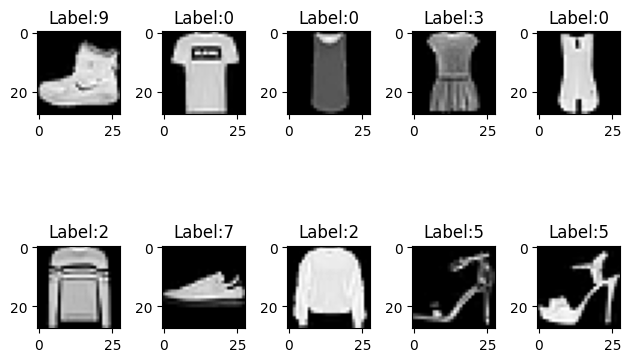

In [ ]:
# 다섯 개(0번~4번)의 데이터 샘플 이미지와 레이블 출력하기
import matplotlib.pyplot as plt
for n in range(0, 10):
  plt.subplot(2, 5, n+1) # (columns, rows, index)
  plt.imshow(x_train[n], cmap=plt.cm.gray)
  plt.title('Label:' + str(y_train[n]))
plt.tight_layout()
plt.show()

##**2. 데이터 준비 및 분석하기**
문제 상황에 맞게 아래 작업을 수행하세요.
- (과제1) 데이터 탐색 <br>
    - 데이터 형태 확인,차원확인,샘플이미지와 레이블 출력
- (과제2) 데이터 전처리
    - 데이터 형태 변형,데이터정규화,원-핫인코딩

In [ ]:
# (과제1-1) 데이터탐색 (데이터 형태 확인, 차원확인)
print(x_test.shape) # 테스트 데이터 형태
print(x_train.shape) # 데이터 형태
print(y_test.shape) # 테스트 레이블 형태
print(y_train.shape) # 레이블 형태

print(x_test.ndim)
print(x_train.ndim)
print(y_test.ndim)
print(y_train.ndim)

(10000, 28, 28)
(60000, 28, 28)
(10000,)
(60000,)
3
3
1
1


In [ ]:
# (과제2-1) 데이터 전처리 (데이터 형태 변형, 데이터정규화)
x_train = x_train.reshape((60000, 28, 28, 1)) # (60000, 28, 28) -> (60000, 28, 28, 1) 흑백이미지기 때문에 1, 컬러면 3
x_test = x_test.reshape((10000, 28, 28, 1))

x_train = x_train/255
x_test = x_test/255

In [ ]:
# (과제2-2) 데이터 전처리 (원-핫인코딩)
# --> 레이블의 숫자를 벡터로 변환 (Exam: 빨(0), 노(1), 파(2) -> 빨[1, 0, 0])
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# (참고) 위에 방식과 이 방식 둘다 OK
#from keras import utils
#y_train = utils.to_categorical(y_train)
#y_test = utils.to_categorical(y_test)

In [ ]:
# 전처리 결과 확인하기
print('데이터 세트(x_train)의 형태:', x_train.shape) # (60000, 784)
print('레이블 세트(y_train)의 형태:', y_train.shape) # (60000, 10)
print('테스트 데이터 세트(x_test)의 형태:', x_test.shape)
print('테스트 레이블 세트(y_test)의 형태:', y_test.shape)

데이터 세트(x_train)의 형태: (60000, 28, 28, 1)
레이블 세트(y_train)의 형태: (60000, 10)
테스트 데이터 세트(x_test)의 형태: (10000, 28, 28, 1)
테스트 레이블 세트(y_test)의 형태: (10000, 10)


##**3. 모델 학습시키기**
문제 상황에 맞게 아래 작업을 수행하세요.
- (과제3) 신경망 모델 생성 (신경망 구조,레이어 추가)
- (과제4) 신경망 모델 학습 (학습방식설정 및 학습)<br>

In [ ]:
# (과제3) 신경망 모델생성 (신경망 구조, 레이어 추가)
# 합성곱층(필터수 32, 커널 사이즈(2, 2), 스트라이드 1씩, 패딩적용) - 풀링층((2, 2)) - 완전연결신경망(은닉층(노드 512개, Relu)-출력층)
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential() # 모델 객체 생성
model.add(Input(shape=(28, 28, 1))) # 입력층
model.add(Conv2D(filters = 32, kernel_size = (2, 2), strides = (1, 1), padding = 'same')) # 합성곱층
model.add(MaxPooling2D(pool_size = (2,2))) # 풀링층
model.add(Flatten()) # 차원변경
model.add(Dense(512, activation = 'relu')) # 완전연결망의 은닉층
model.add(Dense(10, activation = 'softmax')) # 완전연결망의 출력층 (클래스 수만틈 노드 개수 10, 다중분류를 위한 소트프맥스)

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 요약정보 확인하기
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,217,068 (12.27 MB)

 Trainable params: 3,217,066 (12.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# (과제4) 신경망 모델학습  (학습방식설정 및 학습)
# 손실함수 : categorical_crossentropy, 옵티마이저 : SGD, 평가지표 : 정확도
model.compile(loss = 'categorical_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])
# 배치사이즈 : 128, 에포크 : 10회
model.fit(x_train, y_train, batch_size = 128, epochs = 10)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5495 - loss: 1.4614
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7925 - loss: 0.6083
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8167 - loss: 0.5253
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8302 - loss: 0.4805
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8411 - loss: 0.4559
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8445 - loss: 0.4418
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8501 - loss: 0.4258
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8548 - loss: 0.4098
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8594 - loss: 0.3998
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8641 - loss: 0.3879


##**4. 모델 평가하기**
문제 상황에 맞게 아래 작업을 수행하세요.
- (과제5) 모델 성능 평가: 손실값과 정확도 출력

In [ ]:
# (과제5) 모델성능평가하기
loss, acc = model.evaluate(x_test, y_test)
print('손실 : ', loss, '정확도 : ', acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8562 - loss: 0.4058
손실 :  0.4096400737762451 정확도 :  0.8528000116348267


##**5. 모델 활용하기**
문제 상황에 맞게 <u>아래 작업 중 하나 이상</u>을 수행하세요.
- (과제6) 테스트 데이터의 분류 결과 확인
- (선택과제) 새로운 데이터의 분류 결과 확인<br>
※ 새로운 데이터는 업로드된 0~9.png 파일을 이용하거나, 웹에서 구한 이미지를 가공하여 사용

In [ ]:
# (과제6)테스트데이터(X_test[n]  의 분류 결과 확인하기)
y_prob = model.predict(x_test[0].reshape(1, 28, 28, 1)) # (n, 28, 28, 1) 시험 때 주심
y_pred= y_prob.argmax(axis=-1) # 배열에서 최댓값의 인덱스 반환
print("이 의류는", y_pred,"번 클래스입니다.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
이 의류는 [9] 번 클래스입니다.


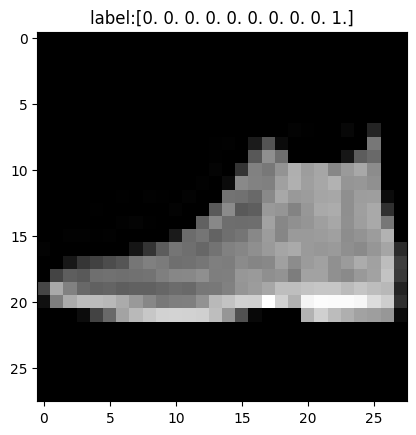

In [ ]:
# n 번째 샘플 이미지와 레이블 출력하기
n = 0
import matplotlib.pyplot as plt
plt.title("label:"+str( y_train[n]))
plt.imshow(x_test[n], cmap=plt.cm.gray)
plt.show()